In [1]:
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None)
warnings.filterwarnings(action='ignore',message='^internal gelsd')

In [3]:
df = pd.read_csv(r"C:\Users\Lenovo\PycharmProjects\GermanBankCreditCard\SouthGermanCredit\SouthGermanCredit.asc",sep=' ')
df

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2,0


In [4]:
df=df.rename(columns={'laufkont':'status', 'laufzeit':'duration', 'moral':'credit_history', 'verw':'purpose', 
                      'hoehe':'amount', 'sparkont':'savings', 'beszeit':'employment_duration', 'rate':'installment_rate',
                      'famges':'personal_status_sex', 'buerge':'other_debtors', 'wohnzeit':'present_residence',
                      'verm':'property', 'alter':'age', 'weitkred':'other_installment_plans', 'wohn':'housing',
                      'bishkred':'number_credits', 'beruf':'job', 'pers':'people_liable', 'telef':'telephone',
                      'gastarb':'foreign_worker', 'kredit':'credit_risk'})
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2,0


+ **laufkont = status**
                                               
    1 : no checking account                       
    2 : ... < 0 DM                                
    3 : 0<= ... < 200 DM                          
    4 : ... >= 200 DM / salary for at least 1 year


+ **laufzeit = duration**
     

+ **moral = credit_history**
                                                
    0 : delay in paying off in the past            
    1 : critical account/other credits elsewhere   
    2 : no credits taken/all credits paid back duly
    3 : existing credits paid back duly till now   
    4 : all credits at this bank paid back duly    


+ **verw = purpose**
                        
    0 : others             
    1 : car (new)          
    2 : car (used)         
    3 : furniture/equipment
    4 : radio/television   
    5 : domestic appliances
    6 : repairs            
    7 : education          
    8 : vacation           
    9 : retraining         
    10 : business          


+ **hoehe = amount**
     

+ **sparkont = savings**
                               
    1 : unknown/no savings account
    2 : ... <  100 DM             
    3 : 100 <= ... <  500 DM      
    4 : 500 <= ... < 1000 DM      
    5 : ... >= 1000 DM            


+ **beszeit = employment_duration**
                     
    1 : unemployed      
    2 : < 1 yr          
    3 : 1 <= ... < 4 yrs
    4 : 4 <= ... < 7 yrs
    5 : >= 7 yrs        
    
    
+ **rate = installment_rate**
                   
    1 : >= 35         
    2 : 25 <= ... < 35
    3 : 20 <= ... < 25
    4 : < 20          


+ **famges = personal_status_sex**
                                         
    1 : male : divorced/separated           
    2 : female : non-single or male : single
    3 : male : married/widowed              
    4 : female : single                     


+ **buerge = other_debtors**
                 
    1 : none        
    2 : co-applicant
    3 : guarantor   


+ **wohnzeit = present_residence**
                     
    1 : < 1 yr          
    2 : 1 <= ... < 4 yrs
    3 : 4 <= ... < 7 yrs
    4 : >= 7 yrs        


+ **verm = property**
                                              
    1 : unknown / no property                    
    2 : car or other                             
    3 : building soc. savings agr./life insurance
    4 : real estate                              


+ **alter = age**
     

+ **weitkred = other_installment_plans**
           
    1 : bank  
    2 : stores
    3 : none  


+ **wohn = housing**
             
    1 : for free
    2 : rent    
    3 : own     


+ **bishkred = number_credits**
         
    1 : 1   
    2 : 2-3 
    3 : 4-5 
    4 : >= 6


+ **beruf = job**
                                               
    1 : unemployed/unskilled - non-resident       
    2 : unskilled - resident                      
    3 : skilled employee/official                 
    4 : manager/self-empl./highly qualif. employee


+ **pers = people_liable**
              
    1 : 3 or more
    2 : 0 to 2   


+ **telef = telephone**
                              
    1 : no                       
    2 : yes (under customer name)


+ **gastarb = foreign_worker**

    1 : yes
    2 : no 


+ **kredit = credit_risk**
         
    0 : bad 
    1 : good

In [5]:
#Report = ProfileReport(df)
#Report.to_widgets()

In [6]:
#Report.to_file('German_Credit_Data.html')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [8]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != "O"]

print('Number of Numerical Feature :', len(numerical_feature))

df[numerical_feature].head()

Number of Numerical Feature : 21


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


In [9]:
for feature in numerical_feature:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is status and number of categories are 4
The feature is duration and number of categories are 33
The feature is credit_history and number of categories are 5
The feature is purpose and number of categories are 10
The feature is amount and number of categories are 923
The feature is savings and number of categories are 5
The feature is employment_duration and number of categories are 5
The feature is installment_rate and number of categories are 4
The feature is personal_status_sex and number of categories are 4
The feature is other_debtors and number of categories are 3
The feature is present_residence and number of categories are 4
The feature is property and number of categories are 4
The feature is age and number of categories are 53
The feature is other_installment_plans and number of categories are 3
The feature is housing and number of categories are 3
The feature is number_credits and number of categories are 4
The feature is job and number of categories are 4
The fe

In [10]:
discrete_variable=[feature for feature in numerical_feature if len(df[feature].unique())<9]

print('Discrete Variable Feature : {}'.format(len(discrete_variable)))

df[discrete_variable].head()

Discrete Variable Feature : 17


,status,credit_history,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,4,1,2,4,2,1,4,2,3,1,1,3,2,1,2,1
1,1,4,1,3,2,3,1,2,1,3,1,2,3,1,1,2,1
2,2,2,2,4,2,2,1,4,1,3,1,1,2,2,1,2,1
3,1,4,1,3,3,3,1,2,1,3,1,2,2,1,1,1,1
4,1,4,1,3,4,3,1,4,2,1,2,2,2,2,1,1,1


In [11]:
continous_variable=[feature for feature in numerical_feature if feature not in df[discrete_variable]]

print('Continous Variable Feature : {}'.format(len(continous_variable)))

df[continous_variable].head()

Continous Variable Feature : 4


,duration,purpose,amount,age
0,18,2,1049,21
1,9,0,2799,36
2,12,9,841,23
3,12,0,2122,39
4,12,0,2171,38


In [12]:
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

<AxesSubplot:xlabel='credit_risk', ylabel='count'>

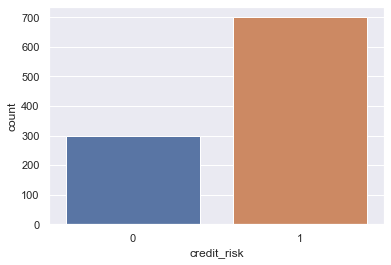

In [13]:
sns.set_theme(style='darkgrid')
sns.countplot(x='credit_risk',data=df)

+ As expected there are way more people with good credit compare to bad credit risk

+ The dataset is not balanced and accuracy of the model won't be good indication unless trained with balanced data

<AxesSubplot:xlabel='foreign_worker', ylabel='count'>

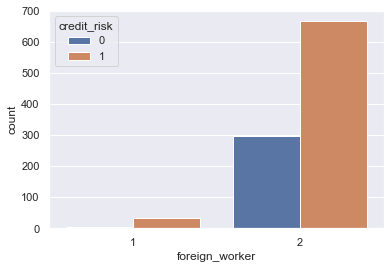

In [14]:
sns.set_theme(style='darkgrid')
sns.countplot(x='foreign_worker',hue='credit_risk',data=df)

<AxesSubplot:xlabel='credit_risk', ylabel='count'>

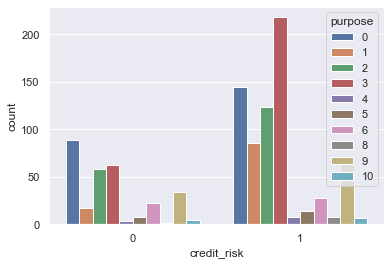

In [15]:
sns.set_theme(style='darkgrid')
sns.countplot(x='credit_risk',hue='purpose',data=df)

(array([ 81., 211., 153., 123.,  91.,  79.,  46.,  32.,  19.,  30.,  27.,
         23.,  18.,  11.,   9.,   6.,   7.,   6.,   4.,   5.,   5.,   1.,
          3.,   4.,   1.,   4.,   0.,   0.,   0.,   1.]),
 array([  250. ,   855.8,  1461.6,  2067.4,  2673.2,  3279. ,  3884.8,
         4490.6,  5096.4,  5702.2,  6308. ,  6913.8,  7519.6,  8125.4,
         8731.2,  9337. ,  9942.8, 10548.6, 11154.4, 11760.2, 12366. ,
        12971.8, 13577.6, 14183.4, 14789.2, 15395. , 16000.8, 16606.6,
        17212.4, 17818.2, 18424. ]),
 <BarContainer object of 30 artists>)

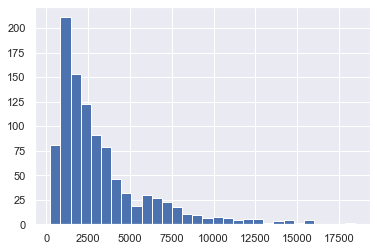

In [16]:
plt.hist(x='amount',bins=30,data=df)

In [17]:
df[df['credit_risk']==0]

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
22,2,36,2,5,2384,1,2,4,3,1,1,4,33,3,1,1,2,2,1,2,0
45,1,18,2,0,1216,1,2,4,2,1,3,3,23,3,1,1,3,2,2,2,0
47,4,18,4,6,1864,2,3,4,2,1,2,1,30,3,2,2,3,2,1,2,0
97,2,36,3,9,4455,1,3,2,1,1,2,1,30,2,2,2,4,2,2,2,0
110,1,15,2,0,3959,1,3,3,2,1,2,2,29,3,2,1,3,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2,0


+ From The Count 751 To The Last Credit_risk Column Having The Value Zero & If You Count Them It Will Be The 250.

+ Before That The Value Zero In Credit_risk Column Having The Count 50.

Text(0.5, 1.0, 'Bad Loans Amount Histogram')

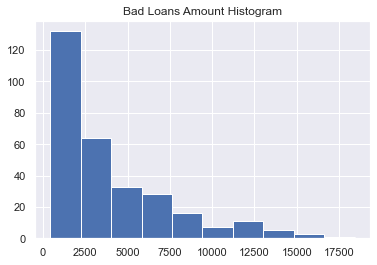

In [18]:
plt.hist(data=df[df['credit_risk']==0],x='amount')
plt.title('Bad Loans Amount Histogram')

+ The bad loans is right skewed and with maximum bad loans under 7500.

+ Highest bad loan could be for the business (can be checked quickly).

In [19]:
max(df[df['credit_risk']==0]['amount'])

18424

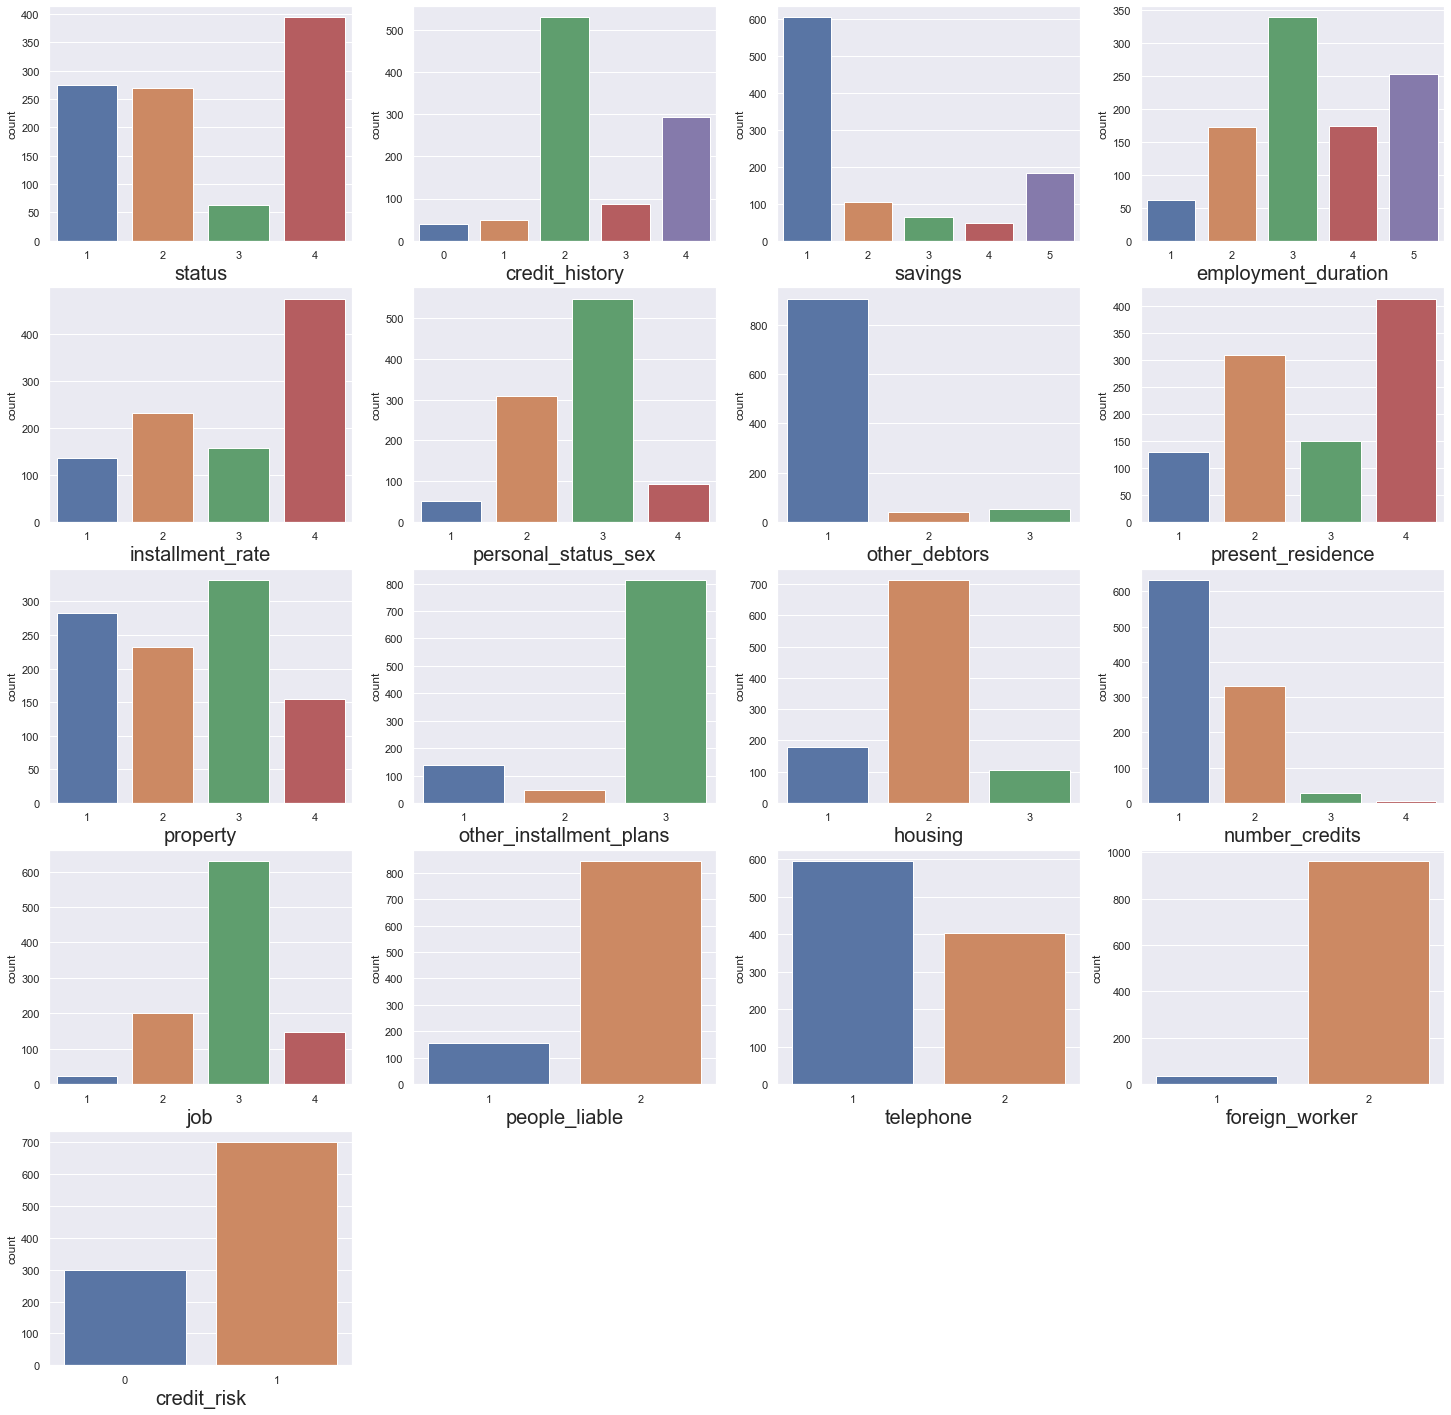

In [20]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber = 1

for i in discrete_variable:
    # There Are 17 Feature In Discrete Variable
    if plotnumber <= 17:
        ax = plt.subplot(5,4,plotnumber)
        sns.countplot(x=i,data=df[discrete_variable])
        plt.xlabel(i,fontsize=20)
    plotnumber += 1
plt.show()

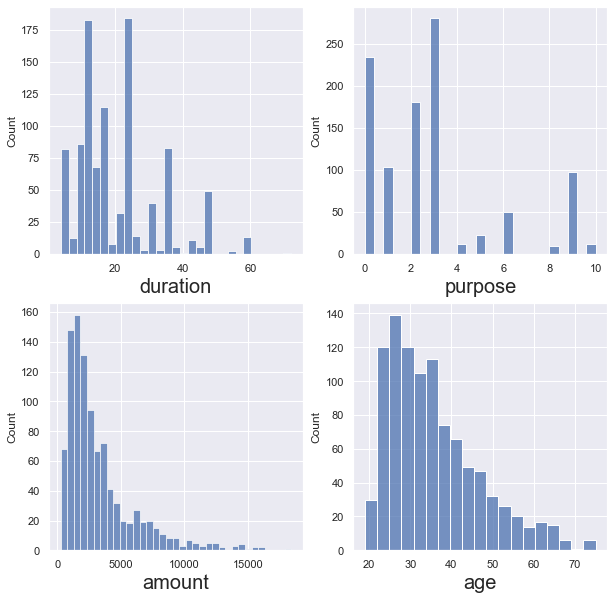

In [21]:
plt.figure(figsize=(10,10))
plotnumber = 1

for i in continous_variable:
    # There Are 4 Feature In Continous Variable
    if plotnumber <= 4:
        ax = plt.subplot(2,2,plotnumber)
        sns.histplot(x=i,data=df[continous_variable])
        plt.xlabel(i,fontsize=20)
    plotnumber += 1
plt.show()

+ From above we can say that the contionous varibale are right skewed. So for proper accuracy we have to do the log transformation on the features.

In [22]:
df.to_csv(r'C:\Users\Lenovo\PycharmProjects\GermanBankCreditCard\SouthGermanCredit\Preprocess.csv')